In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras import models

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 5.8 MB 34.3 MB/s 
     |████████████████████████████████| 438 kB 44.6 MB/s 
     |████████████████████████████████| 1.6 MB 43.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ValueError: ignored

In [ ]:
train="/content/drive/MyDrive/CurrencyDataSets/train"

In [ ]:
test="/content/drive/MyDrive/CurrencyDataSets/test"

In [ ]:
train

'/content/drive/MyDrive/CurrencyDataSets/test'

In [ ]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGeneratorImag

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/CurrencyDataSets/train"
train_datagen = ImageDataGenerator(rescale=1.0/255.,shear_range=0.2,
                                       zoom_range=0.4,
                                       horizontal_flip=True, 
                                         )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=30,
                                                    class_mode='binary',
                                                    target_size=(256, 256))

Found 1719 images belonging to 7 classes.


In [ ]:
VALIDATION_DIR = "/content/drive/MyDrive/CurrencyDataSets/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255.,shear_range=0.2,
                                       zoom_range=0.6,
                                       horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=30,
                                                              class_mode='binary',
                                                              target_size=(256, 256))

Found 3611 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(.5, input_shape=(256,)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
history = model.fit_generator(train_generator,
                              epochs=250,
                              verbose=1,
                              validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/250
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 6/58 [==>...........................] - ETA: 5:56 - loss: 8.9740 - accuracy: 0.1944 

KeyboardInterrupt: ignored

In [ ]:
model.save('CNNmodel.h5')

In [ ]:
import matplotlib.image  as mpimg

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
 epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

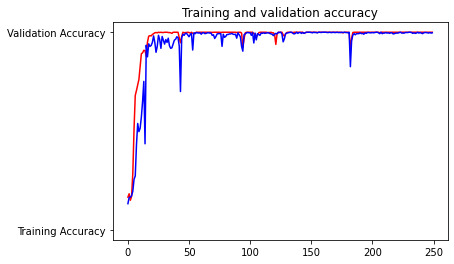

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training and validation accuracy per epoch
# #------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

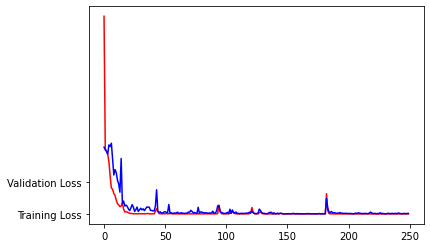

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [ ]:
generator= train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/Traindata', batch_size=10)
label_map = (generator.class_indices)

Found 700 images belonging to 7 classes.


In [ ]:
label_map

{'10': 0, '100': 1, '1000': 2, '20': 3, '50': 4, '500': 5, '5000': 6}

In [ ]:
image = keras.preprocessing.image
#model = keras.models.load_model('/content/drive/MyDrive/CNNmodel (1).h5')
#path to any image to be predicted
path = '/content/drive/MyDrive/dataset/Traindata/10/a10(front)-01.png'
dim = (256,256)
img = image.load_img(path,target_size=(256,256))
#img = cv2.imread(path, cv2.IMREAD_UNCHANGED) 
#resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#img = np.array(resized,dtype='float32')/255
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#[x] can be an array of images 
#images = np.vstack([x])
#classes = model.predict_class(x)
predict = model.predict(x)
predict = np.argmax(predict,axis=1)
print(predict)
# Desired output. Charts with training and validation metrics. No crash :)

[0]


In [ ]:
predict

array([0])

In [ ]:
if predict == 0:
  n = 10
  print(n)
elif predict == 1:
 n = 100
 print(n) 
elif predict == 2:
   n = 1000
   print(n)
elif predict == 3:
  n = 20
  print(n)
elif predict == 4:
  n = 50
  print(n)
elif predict == 5:
  n = 500
  print(n)
elif predict == 6:
  n = 5000
  print(n)          

10
